# 2.3 특정 키워드가 있는 게시물 크롤링을 위해 트위터 API 사용하기

- SNS 데이터의 연관 키워드 분석해보기
- 가장 기본적인 관계 분석 방법인 __연관 규칙__을 활용하여 키워드 간의 관계를 분석 -> 네트워크로 시각화  

In [1]:
import tweepy

CONSUMER_KEY = ''
CONSUMER_SECRET = ''
ACCESS_TOKEN_KEY = ''
ACCESS_TOKEN_SECRET = ''

# 개인정보 인증을 요청하는 Handler
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

# 인증 요청을 수행
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)

# twitter API를 사용하기 위한 준비
api = tweepy.API(auth, wait_on_rate_limit=True)

In [2]:
# twitter API를 사용하여 '손흥민'이 포함된 트윗들을 크롤링한 뒤, entities에서 'user_mentions', 'hashtags'를 추출
keyword = '손흥민'
tweets = api.search(keyword) # search() : 특정 키워드 크롤링
for tweet in tweets:
    print(tweet.entities['user_mentions']) # entities() : 메타데이터에 접근 가능
    print(tweet.entities['hashtags'])
    print(tweet.text)

[]
[{'text': '손흥민', 'indices': [0, 4]}]
#손흥민
손흥민 선수께 질문 합니다!! 

Q.영국생활을 하면서 힘들었거나 힘든점 있었나요?
[]
[{'text': '손흥민', 'indices': [0, 4]}, {'text': 'sonny', 'indices': [5, 11]}, {'text': 'niceonesonny', 'indices': [12, 25]}, {'text': '토트넘', 'indices': [26, 30]}, {'text': 'heungminson', 'indices': [31, 43]}]
#손흥민
#sonny
#niceonesonny
#토트넘
#heungminson
[]
[{'text': '손흥민', 'indices': [0, 4]}]
#손흥민 만약 자유이적이 된다면 어느 클럽에 이적하고 싶으시나요?
[{'screen_name': 'Spurs_KR', 'name': 'Tottenham Hotspur 🇰🇷', 'id': 1341708258818584576, 'id_str': '1341708258818584576', 'indices': [3, 12]}]
[{'text': '골장면다시보기', 'indices': [14, 22]}]
RT @Spurs_KR: #골장면다시보기
[19-20 PL 16라운드] FIFA 푸스카스상을 수상한 골이죠! 언제 봐도 질리지 않는 손흥민 선수의 70m 드리블 원더 골 장면 다시 보시죠!  
🔜 또 보고 싶은 손흥민 선수의 골 장면이 있다면 댓글로…
[]
[{'text': '손흥민', 'indices': [0, 4]}]
#손흥민
[]
[]
유머 역대급 손흥민 골, 어시스트도 역대급. https://t.co/ubd7Oi7Xh3 https://t.co/ejH7gq1aX7
[]
[{'text': '손흥민', 'indices': [0, 4]}]
#손흥민 favourite club as a kid
[]
[{'text': '손흥민', 'indices': [0, 4]}]
#손흥민 언제 결혼하실꺼예요?^^

# 2.4 트위터 API로 '손흥민'과 연관된 키워드 분석하기

- __연관 규칙 분석__ ?  
: 데이터의 집합으로부터 특정한 _규칙_ 들을 찾아내는 분석 방법  
: 어떤 두 아이템 집합이 번번히 발생하는가를 알려주는 일련의 규칙들을 생성하는 알고리즘  
: 소비자들의 구매이력 데이터를 토대로 “X 아이템을 구매하는 고객들은 Y 아이템 역시 구매할 가능성이 높다”는 식의 결론을 내는 알고리즘  
    ex) '기저귀를 구매하는 사람들은 휴지도 함께 구매한다'라는 규칙  
: 인터넷 쇼핑을 할 때 어떤 상품을 고르면 그 상품을 구매한 사람들이 선택한 다른 상품을 제안해준다던지 하는 컨텐츠 기반 추천(contents-based recommendation)의 기본이 되는 방법론  
: 이러한 규칙을 평가할 수 있는 지표로는 지지도와 신뢰도, 향상도같은 지표들이 있다.  

(참고) https://ratsgo.github.io/machine%20learning/2017/04/08/apriori/

## 1) API 호출 : 트위터 API로 데이터 가져오기

In [3]:
# _*_ coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tweepy

CONSUMER_KEY = ''
CONSUMER_SECRET = ''
ACCESS_TOKEN_KEY = ''
ACCESS_TOKEN_SECRET = ''

# 개인정보 인증을 요청하는 Handler
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

# 인증 요청을 수행
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)

# twitter API를 사용하기 위한 준비
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
keyword = '손흥민'
columns = ['created', 'tweet_text']
df = pd.DataFrame(columns=columns) # 크롤링된 데이터 저장할 dataframe

In [5]:
for i in range(1,100): # '손흥민'이 포함된 100페이지의 트윗 크롤링
    print('Get data', str(i/500*100), '% complete..')
    tweets = api.search(keyword)
    for tweet in tweets:
        tweet_text = tweet.text
        created = tweet.created_at
        row = [created, tweet_text]
        series = pd.Series(row, index=df.columns)
        df = df.append(series, ignore_index=True)
print('Get data 100 % complete..')
df.head()

Get data 0.2 % complete..
Get data 0.4 % complete..
Get data 0.6 % complete..
Get data 0.8 % complete..
Get data 1.0 % complete..
Get data 1.2 % complete..
Get data 1.4000000000000001 % complete..
Get data 1.6 % complete..
Get data 1.7999999999999998 % complete..
Get data 2.0 % complete..
Get data 2.1999999999999997 % complete..
Get data 2.4 % complete..
Get data 2.6 % complete..
Get data 2.8000000000000003 % complete..
Get data 3.0 % complete..
Get data 3.2 % complete..
Get data 3.4000000000000004 % complete..
Get data 3.5999999999999996 % complete..
Get data 3.8 % complete..
Get data 4.0 % complete..
Get data 4.2 % complete..
Get data 4.3999999999999995 % complete..
Get data 4.6 % complete..
Get data 4.8 % complete..
Get data 5.0 % complete..
Get data 5.2 % complete..
Get data 5.4 % complete..
Get data 5.6000000000000005 % complete..
Get data 5.800000000000001 % complete..
Get data 6.0 % complete..
Get data 6.2 % complete..
Get data 6.4 % complete..
Get data 6.6000000000000005 % comp

,created,tweet_text
0,2021-01-21 02:05:16,#손흥민\n손흥민 선수께 질문 합니다!! \n\nQ.영국생활을 하면서 힘들었거나 힘...
1,2021-01-21 02:02:11,#손흥민\n#sonny\n#niceonesonny\n#토트넘\n#heungminson
2,2021-01-21 01:52:57,#손흥민 만약 자유이적이 된다면 어느 클럽에 이적하고 싶으시나요?
3,2021-01-21 01:43:55,RT @Spurs_KR: #골장면다시보기\n[19-20 PL 16라운드] FIFA ...
4,2021-01-21 01:33:48,#손흥민


## 2) 추출: 키워드 추출하기

- 한글 문자열 기준으로 키워드 추출 수행

In [6]:
import re

# 텍스트 정제 함수 : 한글 이외의 문자 전부 제거
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result

df['ko_text'] = df['tweet_text'].apply(lambda x: text_cleaning(x))
df.head()

,created,tweet_text,ko_text
0,2021-01-21 02:05:16,#손흥민\n손흥민 선수께 질문 합니다!! \n\nQ.영국생활을 하면서 힘들었거나 힘...,손흥민손흥민 선수께 질문 합니다 영국생활을 하면서 힘들었거나 힘든점 있었나요
1,2021-01-21 02:02:11,#손흥민\n#sonny\n#niceonesonny\n#토트넘\n#heungminson,손흥민토트넘
2,2021-01-21 01:52:57,#손흥민 만약 자유이적이 된다면 어느 클럽에 이적하고 싶으시나요?,손흥민 만약 자유이적이 된다면 어느 클럽에 이적하고 싶으시나요
3,2021-01-21 01:43:55,RT @Spurs_KR: #골장면다시보기\n[19-20 PL 16라운드] FIFA ...,골장면다시보기 라운드 푸스카스상을 수상한 골이죠 언제 봐도 질리지 않는 손흥...
4,2021-01-21 01:33:48,#손흥민,손흥민


In [11]:
# 형태소 데이터를 연관 분석에 용이한 데이터 형태로 만들기 위해 말뭉치를 만들지 않고 "하나의 열 데이터 단위" 로 키워드 추출

from konlpy.tag import Okt
from collections import Counter

korean_stopwords_path = 'data/korean_stopwords.txt'
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    
    # 한 글자 키워드 제거
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어 제거
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

# 'ko_text' feature에 적용
df['nouns'] = df['ko_text'].apply(lambda x : get_nouns(x))
print(df.shape)
df.head()

(1485, 4)


,created,tweet_text,ko_text,nouns
0,2021-01-21 02:05:16,#손흥민\n손흥민 선수께 질문 합니다!! \n\nQ.영국생활을 하면서 힘들었거나 힘...,손흥민손흥민 선수께 질문 합니다 영국생활을 하면서 힘들었거나 힘든점 있었나요,"[손흥민, 손흥민, 선수, 질문, 영국, 생활]"
1,2021-01-21 02:02:11,#손흥민\n#sonny\n#niceonesonny\n#토트넘\n#heungminson,손흥민토트넘,"[손흥민, 토트넘]"
2,2021-01-21 01:52:57,#손흥민 만약 자유이적이 된다면 어느 클럽에 이적하고 싶으시나요?,손흥민 만약 자유이적이 된다면 어느 클럽에 이적하고 싶으시나요,"[손흥민, 자유, 이적, 클럽, 이적]"
3,2021-01-21 01:43:55,RT @Spurs_KR: #골장면다시보기\n[19-20 PL 16라운드] FIFA ...,골장면다시보기 라운드 푸스카스상을 수상한 골이죠 언제 봐도 질리지 않는 손흥...,"[장면, 다시, 보기, 라운드, 푸스카스상, 수상한, 질리, 손흥민, 선수, 드리블..."
4,2021-01-21 01:33:48,#손흥민,손흥민,[손흥민]


---------------------------------------------------------------
- 여기까지 키워드 데이터를 연관 분석의 '장바구니 데이터'와 유사한 형태로 정리
- apyori 라이브러리 : 이러한 형태의 데이터에서 연관 규칙을 쉽게 실행할 수 있다.

## 3) 분석 : 연관 분석을 이용한 키워드 분석

- apyori 라이브러리를 사용해 연관 규칙의 지지도, 신뢰도, 향상도, 나아가 규칙의 조건절과 결과절까지 확인 가능
- Apriori 알고리즘  
: 데이터에서 생성될 수 있는 가능한 모든 연관 규칙 중에 _빈발 집합(frequent sets)_ 만을 우선적으로 고려하여 규칙 생성의 과정 간소화한 것.  
: 일반적인 연관 분석은 데이터에서 생성될 수 있는 모든 규칙을 계산하기 때문에 Apriori와 같은 _빈도 제한 알고리즘_ 을 사용하는 것이 더욱 효율적임.
- Apriori은 _초월 집합(Superset)_ 이라는 개념을 도입하여 규칙의 형태를 제한  
: {(A), (A,B), (A,B,C)...}라는 규칙의 집합이 있다고 할 때, (A,B)와 (A,B,C)를 A의 _초월 집합_ 이라고 한다.  
: 만약 규칙 (A)의 지지도가 의미 있는 수준을 넘지 못한다면 초월 집합들의 지지도는 더욱 작을 것이다. 이 때문에 A의 초월 집합들은 굳이 계산할 필요가 없는 규칙들이 된다. 따라서 (A)의 초월 집합들을 제한하면 일종의 가지치기 처럼 규칙의 형태를 효율적으로 제한할 수 있다. 

#### _연관 규칙의 지지도, 신뢰도, 향상도, 규칙의 조건절과 결과절 확인_

In [12]:
from apyori import apriori

# 장바구니 형태의 데이터(트랜잭션 데이터)를 생성
transactions = [
    ['손흥민', '시소코'],
    ['손흥민', '케인'],
    ['손흥민', '케인', '포체티노']
]

# 연관 분석 수행
results = list(apriori(transactions)) # apriori() : Apriori 알고리즘을 적용하여 연관 규칙을 계산하는 함수
for result in results:
    print(result)

RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])
RelationRecord(items=frozenset({'시소코'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'시소코'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'포체티노'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'포체티노'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'손흥민', '시소코'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민', '시소코'}), confidence=0.3333333333333333, lift=1.0), Or

#### _규칙의 최소 지지도, 최소 신뢰도, 최소 향상도, 규칙의 크기 등 조절 -> 연관 분석 효율적으로 가능_

In [13]:
# 지지도 0.5, 신뢰도 0.6, 향상도 1.0 이상이면서 (손흥민, 케인)처럼 규칙의 크기가 2 이하인 규칙을 추출
list(apriori(transactions,
            min_support=0.5,
            min_confidence=0.6,
            min_lift=1.0,
            max_length=2))

[RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)]),
 RelationRecord(items=frozenset({'손흥민', '케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민', '케인'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'손흥민'}), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'케인'}), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])]

#### _연관 분석을 트위터 키워드에 적용_

In [33]:
# 트랜잭션 데이터 추출 (데이터를 apyori에 활용 가능한 리스트 데이터로 변환)
transactions = df['nouns'].tolist()
# 공백 문자열 방지
transactions = [transaction for transaction in transactions if transaction]
print(transactions)

[['손흥민', '손흥민', '선수', '질문', '영국', '생활'], ['손흥민', '토트넘'], ['손흥민', '자유', '이적', '클럽', '이적'], ['장면', '다시', '보기', '라운드', '푸스카스상', '수상한', '질리', '손흥민', '선수', '드리블', '원더', '장면', '다시', '보시', '보고', '손흥민', '선수', '장면', '댓글'], ['손흥민'], ['유머', '역대', '손흥민', '어시스트', '역대'], ['손흥민'], ['손흥민', '결혼'], ['손흥민', '선수', '대해', '내용', '아래', '트윗', '버튼', '손흥민', '해시태그', '질문', '손흥민', '선수', '트위터', '통해', '직접', '답변', '예정'], ['레알마드리드', '부팀', '역전', '탈락', '뉴스', '기사', '영상', '감독', '이제', '시작', '어차피', '손흥민', '제스', '추어', '속도', '상황'], ['이재명', '지사', '설날', '맞이', '경기', '도민', '십만원', '인심', '비용', '조천억원', '개인', '십만원', '쇠고기', '조천억원', '소형', '아파트', '가구', '비용', '손흥민'], ['손흥민'], ['손흥민', '선수', '대해', '내용', '아래', '트윗', '버튼', '손흥민', '해시태그', '질문', '손흥민', '선수', '트위터', '통해', '직접', '답변', '예정'], ['손흥민', '선수', '대해', '내용', '아래', '트윗', '버튼', '손흥민', '해시태그', '질문', '손흥민', '선수', '트위터', '통해', '직접', '답변', '예정'], ['손흥민', '손흥민', '선수', '영어', '공부'], ['손흥민', '손흥민', '선수', '질문', '영국', '생활'], ['손흥민', '토트넘'], ['손흥민', '자유', '이적', '클럽', '이적'], ['장면', '다시', '보기', '라운드', 

In [55]:
# 연관 분석 수행
results = list(apriori(transactions,
                      min_support=0.2,
                      min_confidence=0.2,
                      min_lift=1,
                      max_length=2)) # 규칙의 크기 2 이하
print(results)

[RelationRecord(items=frozenset({'내용'}), support=0.2, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'내용'}), confidence=0.2, lift=1.0)]), RelationRecord(items=frozenset({'답변'}), support=0.2, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'답변'}), confidence=0.2, lift=1.0)]), RelationRecord(items=frozenset({'대해'}), support=0.2, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'대해'}), confidence=0.2, lift=1.0)]), RelationRecord(items=frozenset({'버튼'}), support=0.2, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'버튼'}), confidence=0.2, lift=1.0)]), RelationRecord(items=frozenset({'선수'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'선수'}), confidence=0.4, lift=1.0)]), RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥

In [56]:
# 결과 새로운 데이터 프레임으로 정의
columns = ['source', 'target', 'support'] # 연관 규칙의 조건절, 결과절, 규칙의 지지도
network_df = pd.DataFrame(columns=columns)

for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items] # ['트윗', '해시태그'] 같은 형태
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df=network_df.append(series, ignore_index=True)
network_df.head(10)

,source,target,support
0,내용,답변,0.2
1,대해,내용,0.2
2,버튼,내용,0.2
3,내용,선수,0.2
4,손흥민,내용,0.2
5,내용,아래,0.2
6,예정,내용,0.2
7,직접,내용,0.2
8,내용,질문,0.2
9,통해,내용,0.2


#### _키워드 빈도 추출_

In [63]:
# 말뭉치 추출 
tweet_corpus = ''.join(df['ko_text'].tolist())

from konlpy.tag import Okt
from collections import Counter

# 명사 키워드 추출
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)

# 한 글자 키워드 제거
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})

# 키워드(node)와 키워드 빈도 점수(nodesize)
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])

# 시각화의 편의를 위해 'nodesize' 50 이하는 제거
node_df = node_df[node_df['nodesize'] >= 50]
node_df.head()

,node,nodesize
0,손흥민,2376
1,선수,990
2,질문,396
3,영국,99
4,생활,99


## 4) 시각화 : 연관 키워드 네트워크 시각화

- network_df, node_df 2개의 데이터 프레임으로 네트워크 시각화 수행

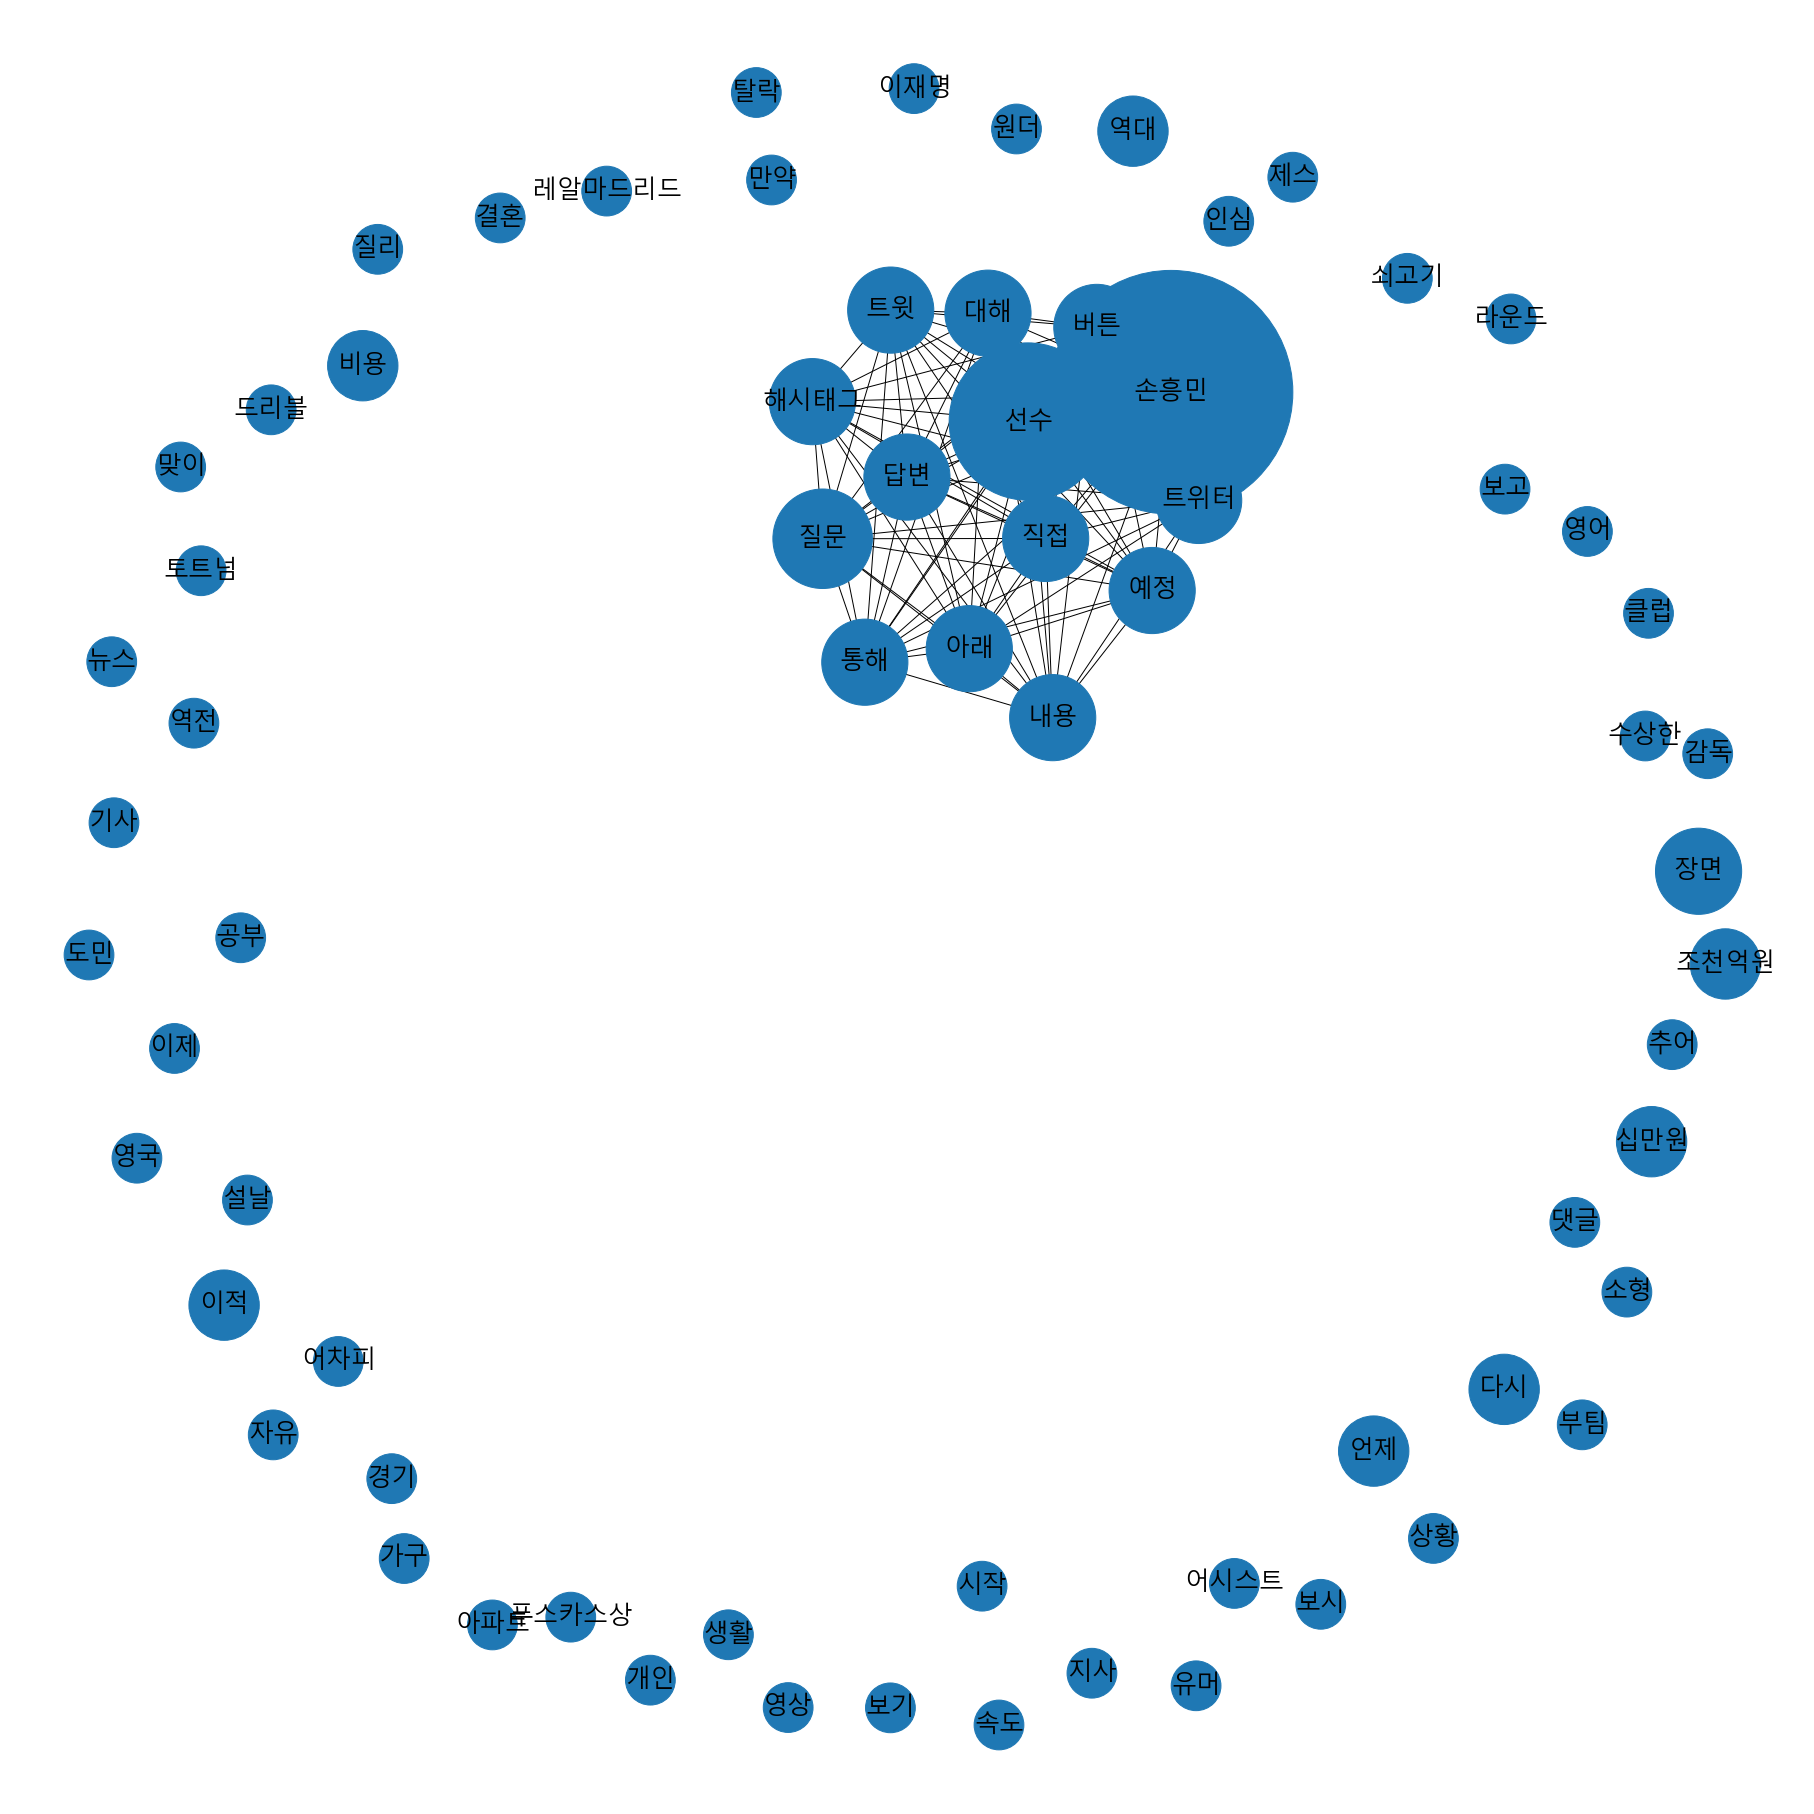

In [73]:
import networkx as nx
plt.figure(figsize=(25,25))

# networkx 그래프 객체 생성
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로하여 네트워크 그래프의 '노드' 역할을 하는 원 생성
for index, row in node_df.iterrows(): # index에 인덱스를 받고, row는 node_df의 행에 하나씩 접근하여 출력
    G.add_node(row['node'], nodesize=row['nodesize'])
    
# network_df의 연관 분석 데이터를 기반으로 네트워크 그래프의 '관계' 역할을 하는 선을 생성
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])
    
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize']*25 for node in G]
nx.draw(G, pos=pos, node_size=sizes)

nx.draw_networkx_labels(G, pos=pos, font_family='Malgun Gothic', font_size=25)

ax = plt.gca()
plt.show()